In [1]:
import pandas as pd  # for easily manipulating databases
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import pickle  # pickle is Python's "serialization" package -- used to save and load any python object easily

# Lab: Support Vector Machines

## The Khan dataset (Gene expression)

This week we will work with the Khan dataset, which is a dataset of tumour tissue samples and their gene expression profiles. The covariates are 2,308 gene expression levels, and the targets are a categorical label of tumour type. So we will be exploring (multi-class) classification with SVMs here.

We also take this opportunity to introduce to you another useful Python package: Pickle. pickle is Python's "serialization" routine, which basically allows you save virtually any Python object (including its current state) and then move it around and load it and pick up where you left off. The dataset here is is saved as a pickle file 'khan_gene.pkl' and you can use the following expression to load it (see the docs if you want to understand further).

In [14]:
data = pickle.load(open('./khan_gene.pkl', 'rb'))

# if you poked around, you would see that its a dictionary. Let's look what's inside.
print(data.keys())

# looks like a training and testing set. let's look how big it is and also display some of the data
print(data['xtrain'].head())  # the entires in the dictionary are Pandas Dataframes
print(data['ytrain'].head())
print(data['xtrain'].shape)
print(data['xtest'].shape)

X_train, Y_train = data['xtrain'], data['ytrain']
X_test, Y_test = data['xtest'], data['ytest']

# explore the different classes
print(data['ytrain'].value_counts())  # remember value_counts shows you all the unique values and their frequencies

dict_keys(['xtest', 'xtrain', 'ytest', 'ytrain'])
      G0001     G0002     G0003     G0004     G0005     G0006     G0007  \
0  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2 -0.084469 -1.649739 -0.241308 -2.875286 -0.889405 -0.027474  1.159300   
3  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

      G0008     G0009     G0010  ...     G2299     G2300     G2301     G2302  \
0  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
1 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
2  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
3  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
4  0.771450  0.030917  0.278313  ... -0.200404  0.061753 -2.273998 -0.039365   

      G2303     G2

We see there are 63 examples in the training set and 20 examples in the testing set. We also see there are 4 different tumour classes (the labels). This dataset is the first time we've worked with p>n. In fact, p>>n here! It is always fundamentally easy to overfit in this regime.

### Problem 1:

Among the kernel functions we discussed in lecture, which should you probably use in this p>>n case and why?

### Solutions:
We should use the linear kernel, because if the dimensionality is much larger than the number of examples, then there is certainly no need for the additional complexity afforded by other kernels such as the polynomial or radial kernel. 

## SVMs in scikit-learn

You can implement a linear SVM in scikit-learn like so. Note there are a few different ways to implement a linear SVM (you can look at the docs (https://scikit-learn.org/stable/modules/svm.html).

### Problem 2
In lectures, we did not discuss multi-class classification with SVMs much, and like most scikit-learn functions, SVC automatically detects that you need a multi-class classifier and accomodates you. Look at the documentation and determine what method it's using to perform multi-class classificaiton.

### Solutions:
At the top of this page: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC, it states that the one-vs-one is used for multi-class support.

In [ ]:
from sklearn import svm

clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X_train, Y_train)  # like all scikit-learn methods, they will automatically infer from the dataset that you are doing multi-class classification
print("Test set predictions:", clf.predict(X_test))  # the predictions

# let's look at the support vectors
sv = clf.support_vectors_
print(sv.shape)
print("So there are %d support vectors" % sv.shape[0])

# have a look at the predicted class labels 
Y_pred = clf.predict(X_train)
print(Y_pred)
print(clf.classes_)  # the columns in the matrix correspond to these class labels (ordering is important) 

### Problem 4:

Compute the training error and explain the result.

### Solutions:
The training error is computed like so. It's zero. This is because when p>>n, it is easy to find a hyperplane in this high-dimensional space that can perfectly separate the data.

In [17]:
# the training error would be fit like so
Y_train_fit = clf.predict(X_train)
train_error = np.mean((Y_train - Y_train_fit)**2)  # this is MSE
print("Training error:", train_error)

Training error: 0.0


## Comparison Experiment

When p>>n, you need to do aggressive feature selection. What models should you immediately start thinking about? Recall that models like Lasso and random forests perform aggressive feature selection. But this is classification -- so what model is analogous to Lasso? The natural choice is logistic regression with an L1 penalty. 

We will prepare to run a comparative experiment.

First, pool the observations into one dataset like so. The following code says to concatenate the DataFrames like X_train and X_test along the first axis. Importantly, we should tell Pandas to ignore the index labels.

In [29]:
X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
Y = pd.concat([Y_train, Y_test], axis=0, ignore_index=True)

print(X.head())
print(Y.head())

print(X.shape)
print(Y.shape)

      G0001     G0002     G0003     G0004     G0005     G0006     G0007  \
0  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2 -0.084469 -1.649739 -0.241308 -2.875286 -0.889405 -0.027474  1.159300   
3  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

      G0008     G0009     G0010  ...     G2299     G2300     G2301     G2302  \
0  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
1 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
2  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
3  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
4  0.771450  0.030917  0.278313  ... -0.200404  0.061753 -2.273998 -0.039365   

      G2303     G2304     G2305     G2306     G2307     V2308  
0 -0

### Prepare for an experiment

If you did an exploration of the data, you'd see that all predictors are numeric valued, their values are all within the same range, and there are no missing values:

In [70]:
print(X.dtypes.value_counts())  # all predictors are numeric valued
print(X.isnull().sum().sum())  # there are no missing values

print(X.describe())  # eyeball descriptive summaries of the data

# In classification, it's also a good idea to look at the "balance" of the labels in the dataset
print(Y.value_counts())

float64    2308
Name: count, dtype: int64
0
           G0001      G0002      G0003      G0004      G0005      G0006  \
count  83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean    0.095508  -1.661939  -0.203707  -1.359657  -1.376694   0.355879   
std     0.904378   0.882391   0.704871   1.174159   0.585545   0.780256   
min    -2.683846  -3.007805  -1.851509  -3.366796  -3.216379  -1.263723   
25%    -0.265028  -2.322890  -0.568117  -2.277448  -1.806496  -0.065349   
50%     0.239410  -1.813392  -0.103030  -1.736136  -1.266558   0.519032   
75%     0.735390  -1.147199   0.290426   0.113641  -0.933310   0.878176   
max     1.471485   0.654770   1.160742   0.583779  -0.264747   2.452728   

           G0007      G0008      G0009      G0010  ...      G2299      G2300  \
count  83.000000  83.000000  83.000000  83.000000  ...  83.000000  83.000000   
mean    1.681210   0.137365   0.241915   0.393151  ...  -0.459341  -0.575929   
std     0.443620   0.497517   0.451735  

## Experiment

Now run the experiment as we have done in previous labs to compare random forest classifiers, gradient boosting classifiers, and the (linear) SVC. Note that logistic regression with an L1 penalty takes a bit too long to run on this huge p dataset, so you can leave it out of this exercise; for the same reason, you may wish to skip cross-validating over the GBT parameters.

### Problem 5
What is a good naive baseline to use? Think of one and include in the comparison.

Additionally, what performance metric should you use for this classification problem? There are several choices, and in my opinion AUC is still the most popular and respected choice. However, using AUC here involves several concepts and data cleaning/management steps that are cumbersome for the purposes of this lab, so we will instead simply use accuracy (which should be too bad since the dataset does not appear to be severely imbalanced).

Finally, because this dataset has a small number of training examples, we should probably not randomly subsample train/test splits like we have done in previous labs. We should use something like K-fold splitting to ensure we maximally use up all the available data.

The following code snippet below is copy and pasted from previous labs, where I have already applied the use of the accuracy score and K-fold train/test splits for you. Modify it to your needs.

### Solutions:
In the below code, I use the majority class appearing in Y_train as the naive baseline. The predicted class proability for every test case with this naive baseline is the fraction of training datapoints belonging to this majority class.

In [72]:
from sklearn.linear_model import LogisticRegressionCV  # logistic regression with built in regularization. The penalty parameter is Cross-validated
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt # for plotting
import time # for timekeeping

"""


"""

# The following grids will be used to cross-validate over the GBT and SVM parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid_gbt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
}

param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# container for the AUC scores
scores = {}  # this time we will use a dictionary structure to contain the performance metrics
for model_name in ['rf', 'gbt', 'svm']:
    scores[model_name] = []  # initialize this dictionary entry to an empty list

kf = KFold(n_splits=10, shuffle=True)   # will make a test set size of about 10% of the data 

i_ = 0
for train_inds, test_inds in kf.split(X):
    
    t_start = time.time()  # used to time things
    i_ += 1

    print("N train:", len(train_inds))
    print("N test:", len(test_inds))

    X_train = X.iloc[train_inds, :].copy()  # remember .iloc is used for integer indexing!
    X_test = X.iloc[test_inds, :].copy()
    
    Y_train = Y.iloc[train_inds]
    Y_test = Y.iloc[test_inds]
    
    # standardize the predictors
    for key in X_train.columns:
        x_mean = X_train[key].mean()
        x_std = X_train[key].std()
        X_train.loc[:, key] = (X_train[key] - x_mean) / x_std  # vectorized
        X_test.loc[:, key] = (X_test[key] - x_mean) / x_std  # use the training statistics to transform the test cases

    # # logistic regression with L1 penalty cross-validated
    # clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000)  # uses 5-fold cross validation by default
    # clf.fit(X_train, Y_train)  
    # Y_pred = clf.predict_proba(X_test)  
    # auc = roc_auc_score(Y_test, Y_pred, multi_class='ovr')  # one-vs-rest scheme for multi-class classification
    # auc_scores['logreg_l1'].append(auc)
    # print("Finished logreg l1 split:", i_)

    # Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=500)
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores['rf'].append(score)
    print("Finished RF split:", i_)

    # Gradient Boosting Classifier
    clf = GradientBoostingClassifier(n_estimators=500)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores['gbt'].append(score)
    print("Finished GBT split:", i_)

    # SVM
    grid = GridSearchCV(
        svm.SVC(kernel='linear'),
        param_grid_svm,
        cv=5,
    )
    grid.fit(X_train, Y_train)
    clf = grid.best_estimator_
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores['svm'].append(score)
    print("Finished SVM split:", i_)
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)

N train: 74
N test: 9
Finished RF split: 1
Finished GBT split: 1
Finished SVM split: 1
This split took: 14.22 secs
N train: 74
N test: 9
Finished RF split: 2
Finished GBT split: 2
Finished SVM split: 2
This split took: 14.05 secs
N train: 74
N test: 9
Finished RF split: 3
Finished GBT split: 3
Finished SVM split: 3
This split took: 14.50 secs
N train: 75
N test: 8
Finished RF split: 4
Finished GBT split: 4
Finished SVM split: 4
This split took: 14.81 secs
N train: 75
N test: 8
Finished RF split: 5
Finished GBT split: 5
Finished SVM split: 5
This split took: 14.70 secs
N train: 75
N test: 8
Finished RF split: 6
Finished GBT split: 6
Finished SVM split: 6
This split took: 13.81 secs
N train: 75
N test: 8
Finished RF split: 7
Finished GBT split: 7
Finished SVM split: 7
This split took: 15.01 secs
N train: 75
N test: 8
Finished RF split: 8
Finished GBT split: 8
Finished SVM split: 8
This split took: 14.80 secs
N train: 75
N test: 8
Finished RF split: 9
Finished GBT split: 9
Finished SVM sp

logreg_l1 ave accuracy: nan
rf ave accuracy: 1.0
gbt ave accuracy: 0.9
svm ave accuracy: 1.0


/Users/koa/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/koa/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Accuracy')

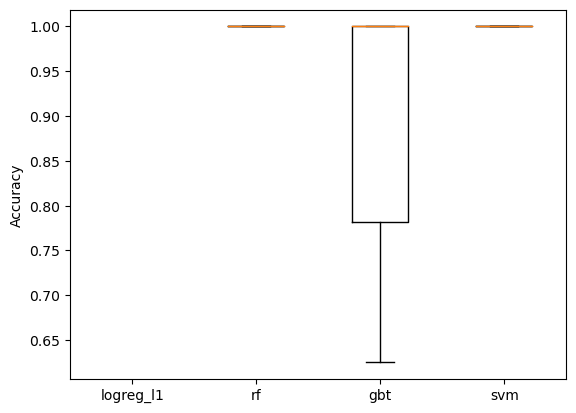

In [73]:
model_names = list(scores.keys())

for name in model_names:
    scores_ = scores[name]
    print("%s ave accuracy:" % name, np.mean(scores_))

plt.boxplot([scores[name] for name in model_names])
plt.xticks(list(range(1, len(model_names) + 1)), model_names)
plt.ylabel('Accuracy')

In [74]:
scores

{'logreg_l1': [],
 'rf': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'gbt': [1.0, 1.0, 1.0, 1.0, 0.875, 0.625, 0.75, 1.0, 0.75, 1.0],
 'svm': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}